In [229]:
import pandas as pd
 
 
# collect data
data = {
    'x': [45, 37, 42, 35, 39],
    'y': [38, 31, 26, 28, 33],
    'z': [10, 15, 17, 21, 12]
}
 
# form dataframe
dataframe = pd.DataFrame(data, columns=['x', 'y', 'z'])
print("Dataframe is : ")
print(dataframe)
 
# form correlation matrix
matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)

Dataframe is : 
    x   y   z
0  45  38  10
1  37  31  15
2  42  26  17
3  35  28  21
4  39  33  12
Correlation matrix is : 
          x         y         z
x  1.000000  0.518457 -0.701886
y  0.518457  1.000000 -0.860941
z -0.701886 -0.860941  1.000000


In [308]:
import findspark 
import pyspark
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
from pyspark.sql.functions import max , min , mean 
import pyspark.sql.functions as func 
from pyspark.sql import SparkSession
import seaborn as sn

spark = SparkSession.builder.getOrCreate()
findspark.init()


In [3]:
!pip install sklearn

In [309]:
df = spark.read.csv("nuclear_plants_small_dataset.csv", inferSchema=True , header = True )
# df.where(df.Status == "Abnormal").show(10, truncate = 20)
# df.sort_values("Power_range_sensor_1")
# df.printSchema()

In [219]:
#task 2


#the power range sensors staticstics 

# #The maximum values power range sensors (Normal)
max_pr_1 = df.groupBy("status").max("Power_range_sensor_1").withColumnRenamed("max(Power_range_sensor_1)","max of power range 1")
max_pr_2 = df.groupBy("status").max("Power_range_sensor_2").withColumnRenamed("max(Power_range_sensor_2)","max of power range 2")
max_pr_3 = df.groupBy("status").max("Power_range_sensor_3 ").withColumnRenamed("max(Power_range_sensor_3 )","max of power range 3")
max_pr_4 = df.groupBy("status").max("Power_range_sensor_4").withColumnRenamed("max(Power_range_sensor_4)","max of power range 4")

max_pr_1.show()
max_pr_2.show()
max_pr_3.show()
max_pr_4.show()


# #the minimum values of power range sensors (Normal)
min_pr_1 = df.groupBy("status").min("Power_range_sensor_1").withColumnRenamed("min(Power_range_sensor_1)","minimum of power range 1")
min_pr_2 = df.groupBy("status").min("Power_range_sensor_2").withColumnRenamed("min(Power_range_sensor_2)","minimum of power range 2")
min_pr_3 = df.groupBy("status").min("Power_range_sensor_3 ").withColumnRenamed("min(Power_range_sensor_3 )","minimum of power range 3")
min_pr_4 = df.groupBy("status").min("Power_range_sensor_4").withColumnRenamed("min(Power_range_sensor_4)","minimum of power range 4")

min_pr_1.show()
min_pr_2.show()
min_pr_3.show()
min_pr_4.show()

# #The mean of power range sensors  (Normal)
average_pr_1 = df.groupBy("status").mean("Power_range_sensor_1").withColumnRenamed("avg(Power_range_sensor_1)","average power range sensor 1")
average_pr_2 = df.groupBy("status").mean("Power_range_sensor_2").withColumnRenamed("avg(Power_range_sensor_2)","average power range sensor 2")
average_pr_3 = df.groupBy("status").mean("Power_range_sensor_3 ").withColumnRenamed("avg(Power_range_sensor_3 )","average power range sensor 3")
average_pr_4 = df.groupBy("status").mean("Power_range_sensor_4").withColumnRenamed("avg(Power_range_sensor_4)","average power range sensor 4")


average_pr_1.show()
average_pr_2.show()
average_pr_3.show()
average_pr_4.show()

#the medians of power range sensors 
median1 = df.groupBy("status").agg(func.percentile_approx("Power_range_sensor_1",0.5).alias("median of power range 1"))
median2 = df.groupBy("status").agg(func.percentile_approx("Power_range_sensor_2",0.5).alias("median of power range 2"))
median3 = df.groupBy("status").agg(func.percentile_approx("Power_range_sensor_3 ",0.5).alias("median of power range 3"))
median4 = df.groupBy("status").agg(func.percentile_approx("Power_range_sensor_4",0.5).alias("median of power range 4"))

print("The median of power range sensors (Normal and Abnormal status)")
median1.show()
median2.show()
median3.show()
median4.show()

#the mode of power range sensors 
mode_prs = []
mode_prs.insert(0,df.groupby("Power_range_sensor_1").count().orderBy("count", ascending=False).first()[0])
mode_prs.insert(1,df.groupby("Power_range_sensor_2").count().orderBy("count", ascending=False).first()[0])
mode_prs.insert(2,df.groupby("Power_range_sensor_3 ").count().orderBy("count", ascending=False).first()[0])
mode_prs.insert(2,df.groupby("Power_range_sensor_4").count().orderBy("count", ascending=False).first()[0])

i = 1
for x in mode_prs:
  print("the mode of power range sensors",i, "=" , x)
  i+=1


df.agg({'Power_range_sensor_1': 'variance'}).show()
df.agg({'Power_range_sensor_2': 'variance'}).show()
df.agg({'Power_range_sensor_3 ': 'variance'}).show()
df.agg({'Power_range_sensor_4': 'variance'}).show()





print("###########################################################")


#the pressure sensors staticstics 


#The maximum values pressure sensors 
max_ps_1 = df.groupBy("status").max("Pressure _sensor_1").withColumnRenamed("max(Pressure _sensor_1)","max of pressure sensor 1")
max_ps_2 = df.groupBy("status").max("Pressure _sensor_2").withColumnRenamed("max(Pressure _sensor_2)","max of pressure sensor 2")
max_ps_3 = df.groupBy("status").max("Pressure _sensor_3").withColumnRenamed("max(Pressure _sensor_3)","max of pressure sensor 3")
max_ps_4 = df.groupBy("status").max("Pressure _sensor_4").withColumnRenamed("max(Pressure _sensor_4)","max of pressure sensor 4")

# max_ps_1.show()
# max_ps_2.show()
# max_ps_3.show()
# max_ps_4.show()


# #the minimum values of pressure sensors 
min_ps_1 = df.groupBy("status").min("Pressure _sensor_1").withColumnRenamed("min(Pressure _sensor_1)","minimum of pressure sensor 1")
min_ps_2 = df.groupBy("status").min("Pressure _sensor_2").withColumnRenamed("min(Pressure _sensor_2)","minimum of pressure sensor 2")
min_ps_3 = df.groupBy("status").min("Pressure _sensor_3").withColumnRenamed("min(Pressure _sensor_3)","minimum of pressure sensor 3")
min_ps_4 = df.groupBy("status").min("Pressure _sensor_4").withColumnRenamed("min(Pressure _sensor_4)","minimum of pressure sensor 4")

# min_ps_1.show()
# min_ps_2.show()
# min_ps_3.show()
# min_ps_4.show()

#The mean of Pressure sensors   
average_ps_1 = df.groupBy("status").mean("Pressure _sensor_1").withColumnRenamed("avg(Pressure _sensor_1)","average pressure sensor 1")
average_ps_2 = df.groupBy("status").mean("Pressure _sensor_2").withColumnRenamed("avg(Pressure _sensor_2)","average pressure sensor 2")
average_ps_3 = df.groupBy("status").mean("Pressure _sensor_3").withColumnRenamed("avg(Pressure _sensor_3)","average pressure sensor 3")
average_ps_4 = df.groupBy("status").mean("Pressure _sensor_4").withColumnRenamed("avg(Pressure _sensor_4)","average pressure sensor 4")


average_ps_1.show()
average_ps_2.show()
average_ps_3.show()
average_ps_4.show()

#the medians of Pressure sensors 
median12 = df.groupBy("status").agg(func.percentile_approx("Pressure _sensor_1",0.5).alias("median of pressure sensor 1"))
median22 = df.groupBy("status").agg(func.percentile_approx("Pressure _sensor_2",0.5).alias("median of pressure sensor 2"))
median32 = df.groupBy("status").agg(func.percentile_approx("Pressure _sensor_3",0.5).alias("median of pressure sensor 3"))
median42 = df.groupBy("status").agg(func.percentile_approx("Pressure _sensor_4",0.5).alias("median of pressure sensor 4"))

print("The median of pressure sensors (Normal and Abnormal status)")
median12.show()
median22.show()
median32.show()
median42.show()
#the mode of Pressure sensors 
mode_ps = []
mode_ps.insert(0,df.groupby("Pressure _sensor_1").count().orderBy("count", ascending=False).first()[0])
mode_ps.insert(1,df.groupby("Pressure _sensor_2").count().orderBy("count", ascending=False).first()[0])
mode_ps.insert(2,df.groupby("Pressure _sensor_3").count().orderBy("count", ascending=False).first()[0])
mode_ps.insert(2,df.groupby("Pressure _sensor_4").count().orderBy("count", ascending=False).first()[0])

i = 1
for x in mode_ps:
  print("the mode of Pressure sensors",i, "=" , x)
  i+=1


print("###########################################################")
print(" ")

#the variance of pressure sensors 

df.agg({'Pressure _sensor_1': 'variance'}).show()
df.agg({'Pressure _sensor_2': 'variance'}).show()
df.agg({'Pressure _sensor_3': 'variance'}).show()
df.agg({'Pressure _sensor_4': 'variance'}).show()





#The maximum values Vibration sensors 
max_vs_1 = df.groupBy("status").max("Vibration_sensor_1").withColumnRenamed("max(Vibration_sensor_1)","max of Vibration sensor 1")
max_vs_2 = df.groupBy("status").max("Vibration_sensor_2").withColumnRenamed("max(Vibration_sensor_2)","max of Vibration sensor 2")
max_vs_3 = df.groupBy("status").max("Vibration_sensor_3").withColumnRenamed("max(Vibration_sensor_3)","max of Vibration sensor 3")
max_vs_4 = df.groupBy("status").max("Vibration_sensor_4").withColumnRenamed("max(Vibration_sensor_4)","max of Vibration sensor 4")

# max_vs_1.show()
# max_vs_2.show()
# max_vs_3.show()
# max_vs_4.show()


# #the minimum values of Vibration sensors (Normal)
min_vs_1 = df.groupBy("status").min("Vibration_sensor_1").withColumnRenamed("min(Vibration_sensor_1)","minimum of Vibration sensor 1")
min_vs_2 = df.groupBy("status").min("Vibration_sensor_2").withColumnRenamed("min(Vibration_sensor_2)","minimum of Vibration sensor 2")
min_vs_3 = df.groupBy("status").min("Vibration_sensor_3").withColumnRenamed("min(Vibration_sensor_3)","minimum of Vibration sensor 3")
min_vs_4 = df.groupBy("status").min("Vibration_sensor_4").withColumnRenamed("min(Vibration_sensor_4)","minimum of Vibration sensor 4")

# min_vs_1.show()
# min_vs_2.show()
# min_vs_3.show()
# min_vs_4.show()

#The mean of Vibration sensors   
average_vs_1 = df.groupBy("status").mean("Vibration_sensor_1").withColumnRenamed("avg(Vibration_sensor_1)","average Vibration sensor 1")
average_vs_2 = df.groupBy("status").mean("Vibration_sensor_2").withColumnRenamed("avg(Vibration_sensor_2)","average Vibration sensor 2")
average_vs_3 = df.groupBy("status").mean("Vibration_sensor_3").withColumnRenamed("avg(Vibration_sensor_3)","average Vibration sensor 3")
average_vs_4 = df.groupBy("status").mean("Vibration_sensor_4").withColumnRenamed("avg(Vibration_sensor_4)","average Vibration sensor 4")


# average_vs_1.show()
# average_vs_2.show()
# average_vs_3.show()
# average_vs_4.show()

#the medians of Vibration sensors 
median13 = df.groupBy("status").agg(func.percentile_approx("Vibration_sensor_1",0.5).alias("median of Vibration sensor 1"))
median23 = df.groupBy("status").agg(func.percentile_approx("Vibration_sensor_2",0.5).alias("median of Vibration sensor 2"))
median33 = df.groupBy("status").agg(func.percentile_approx("Vibration_sensor_3",0.5).alias("median of Vibration sensor 3"))
median43 = df.groupBy("status").agg(func.percentile_approx("Vibration_sensor_4",0.5).alias("median of Vibration sensor 4"))

# print("The median of pressure sensors (Normal and Abnormal status)")
# median13.show()
# median23.show()
# median33.show()
# median43.show()

#the mode of Vibration sensors 
mode_vs = []

mode_vs.insert(0,df.groupby("Vibration_sensor_1").count().orderBy("count", ascending=False).first()[0])
mode_vs.insert(1,df.groupby("Vibration_sensor_2").count().orderBy("count", ascending=False).first()[0])
mode_vs.insert(2,df.groupby("Vibration_sensor_3").count().orderBy("count", ascending=False).first()[0])
mode_vs.insert(3,df.groupby("Vibration_sensor_4").count().orderBy("count", ascending=False).first()[0])

# i = 1
# for x in mode_vs:
#   print("the mode of vibration sensors",i, "=" , x)
#   i+=1
    

#the variance of Vibration sensors 

# df.agg({'Vibration_sensor_1': 'variance'}).show()
# df.agg({'Vibration_sensor_2': 'variance'}).show()
# df.agg({'Vibration_sensor_3': 'variance'}).show()
# df.agg({'Vibration_sensor_4': 'variance'}).show()



+--------+--------------------+
|  status|max of power range 1|
+--------+--------------------+
|Abnormal|           10.923078|
|  Normal|             12.1298|
+--------+--------------------+

+--------+--------------------+
|  status|max of power range 2|
+--------+--------------------+
|Abnormal|             10.1541|
|  Normal|             11.9284|
+--------+--------------------+

+--------+--------------------+
|  status|max of power range 3|
+--------+--------------------+
|Abnormal|             15.7599|
|  Normal|             14.0982|
+--------+--------------------+

+--------+--------------------+
|  status|max of power range 4|
+--------+--------------------+
|Abnormal|           17.235858|
|  Normal|             16.3568|
+--------+--------------------+

+--------+------------------------+
|  status|minimum of power range 1|
+--------+------------------------+
|Abnormal|                  0.0082|
|  Normal|                  0.0851|
+--------+------------------------+

+--------+-

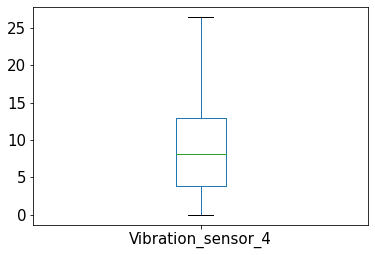

In [228]:
df_pandas = df.toPandas()
boxplot24 = df_pandas.where(df_pandas.Status == "Abnormal").boxplot(grid=False, fontsize=15, column=['Vibration_sensor_4'])


In [311]:
print(df.stat.corr("Power_range_sensor_1","Power_range_sensor_2"))
print(df.stat.corr("Power_range_sensor_1","Power_range_sensor_3 "))
print(df.stat.corr("Power_range_sensor_1","Power_range_sensor_4"))
print("----------------")
print(df.stat.corr("Power_range_sensor_2","Power_range_sensor_3 "))
print(df.stat.corr("Power_range_sensor_2","Power_range_sensor_4"))
print("----------------")
print(df.stat.corr("Power_range_sensor_3 ","Power_range_sensor_4"))
print("----------------")

dfx = df.stat.corr("Power_range_sensor_1","Power_range_sensor_2")
# sn.heatmap(dfx, annot=False)
# plt.show()
print("the correlation betwen sensor 2 and 3 are the highest ")


0.09523532465708762
0.22994307456693538
0.49979507054382766
----------------
0.6938180292187088
0.22843780589066381
----------------
0.08336219857360834
----------------
the correlation betwen sensor 2 and 3 are the highest 


In [216]:
print(df.stat.corr("Pressure _sensor_1","Pressure _sensor_2"))
print(df.stat.corr("Pressure _sensor_1","Pressure _sensor_3"))
print(df.stat.corr("Pressure _sensor_1","Pressure _sensor_4"))
print("-------------------")
print(df.stat.corr("Pressure _sensor_2","Pressure _sensor_3"))
print(df.stat.corr("Pressure _sensor_2","Pressure _sensor_4"))
print("-------------------")
print(df.stat.corr("Pressure _sensor_3","Pressure _sensor_4"))

print("the correlation between sensor 2 and 4 is the highest")


0.11685894528038385
-0.11871273248130898
0.13113622174925188
-------------------
0.09134085158325297
0.5714030200072249
-------------------
0.0015910766910307323
the correlation between sensor 2 and 4 is the highest


In [218]:
print(df.stat.corr("Vibration_sensor_1","Vibration_sensor_2"))
print(df.stat.corr("Vibration_sensor_1","Vibration_sensor_3"))
print(df.stat.corr("Vibration_sensor_1","Vibration_sensor_4"))
print("----------------")
print(df.stat.corr("Vibration_sensor_2","Vibration_sensor_3"))
print(df.stat.corr("Vibration_sensor_2","Vibration_sensor_4"))
print("----------------")
print(df.stat.corr("Vibration_sensor_3","Vibration_sensor_4"))
print("----------------")
sn.heatmap(df_cm, annot=False)
plt.show()
print("there is no strong correlation between vibration sensors ")


-0.04585742910279665
-0.07627690018747484
0.026480188916395222
----------------
0.1037039727468421
-0.023289826216640285
----------------
-0.015535574010048854
----------------
there is no strong correlation between vibration sensors 


In [162]:
#dealing with missing data

status_count = df.groupBy("Status").count()
status_count.show()
rows = status_count.select("count").collect()
normalCount=rows[0][0]
abnormalCount=rows[1][0]
total = normalCount + abnormalCount
normalPercentage = round((normalCount/total)*100 )
abnormalPercentage = round((abnormalCount/total)*100)
print('{0:0d} % normal : {1:0d} % abnormal'.format(normalPercentage,abnormalPercentage))
print("total" , total)



+--------+-----+
|  Status|count|
+--------+-----+
|Abnormal|  498|
|  Normal|  498|
+--------+-----+

Normal status percentage =  50 %
Abnormal status  percentage =  50 %
50 % normal : 50 % abnormal
total 996


In [160]:
### Get count of both null and missing values in pyspark

from pyspark.sql.functions import isnan, when, count, col
# df.select("Status").show()
df1 = df.select("Status","Power_range_sensor_1","Power_range_sensor_2","Power_range_sensor_3 ","Power_range_sensor_4")
df2 = df.select("Pressure _sensor_1","Pressure _sensor_2","Pressure _sensor_3","Pressure _sensor_4")
df3 = df.select("Vibration_sensor_1","Vibration_sensor_2","Vibration_sensor_3","Vibration_sensor_4")
print("The count of missing data in the dataset")
print("----------------------------------------")
print(" ")
x = df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show(truncate = 10)
y = df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df2.columns]).show(truncate = 10)
z = df3.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df3.columns]).show(truncate = 10)

The count of missing data in the dataset
----------------------------------------
 
+------+--------------------+--------------------+---------------------+--------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+
|     0|                   0|                   0|                    0|                   0|
+------+--------------------+--------------------+---------------------+--------------------+

+------------------+------------------+------------------+------------------+
|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|
+------------------+------------------+------------------+------------------+
|                 0|                 0|                 0|                 0|
+------------------+------------------+------------------+------------------+

+------------------+------------------+---------------

In [304]:
# test = df.groupBy("Status").count()
# test.show()



ValueError: Must pass 2-d input. shape=()

In [8]:
#task 4 

# X =df.select(df.columns[1:-1]).collect().reshape(-1)
# y = df.select(df.columns[0:1]).collect()
# np.array(df.select("Vibration_sensor_2").collect())
# np.array(df.select("Vibration_sensor_1").collect())
# print(X)
# print(y)

# y.show()
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [10]:
from pyspark.ml.feature import VectorAssembler

In [11]:
df.columns

['Status',
 'Power_range_sensor_1',
 'Power_range_sensor_2',
 'Power_range_sensor_3 ',
 'Power_range_sensor_4',
 'Pressure _sensor_1',
 'Pressure _sensor_2',
 'Pressure _sensor_3',
 'Pressure _sensor_4',
 'Vibration_sensor_1',
 'Vibration_sensor_2',
 'Vibration_sensor_3',
 'Vibration_sensor_4']

In [16]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [168]:
indexer = StringIndexer(inputCol="Status", outputCol="Status_index").fit(df)
df_ind = indexer.transform(df)
df_ind.select("Status_index").show()

+------------+
|Status_index|
+------------+
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
|         1.0|
+------------+
only showing top 20 rows



In [19]:
from pyspark.ml.feature import VectorAssembler 

In [20]:
df_ind.columns

['Status',
 'Power_range_sensor_1',
 'Power_range_sensor_2',
 'Power_range_sensor_3 ',
 'Power_range_sensor_4',
 'Pressure _sensor_1',
 'Pressure _sensor_2',
 'Pressure _sensor_3',
 'Pressure _sensor_4',
 'Vibration_sensor_1',
 'Vibration_sensor_2',
 'Vibration_sensor_3',
 'Vibration_sensor_4',
 'Status_index']

In [22]:
assembler = VectorAssembler(inputCols = ['Power_range_sensor_1','Power_range_sensor_2','Power_range_sensor_3 ',
                                         'Power_range_sensor_4','Pressure _sensor_1','Pressure _sensor_2',
                                         'Pressure _sensor_3','Pressure _sensor_4','Vibration_sensor_1',
                                         'Vibration_sensor_2','Vibration_sensor_3',
                                         'Vibration_sensor_4'],outputCol="features")
assembler

VectorAssembler_ad1a0f07f5e3

In [23]:
output = assembler.transform(df_ind)
output.select("features","Power_range_sensor_1").show(5,truncate =100)

+----------------------------------------------------------------------------------------+--------------------+
|                                                                                features|Power_range_sensor_1|
+----------------------------------------------------------------------------------------+--------------------+
|   [4.5044,0.7443,6.34,1.9052,29.5315,0.8647,2.2044,6.048,14.4659,21.648,15.3429,1.2186]|              4.5044|
|[4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856,20.8356,0.0646,14.8813,7.3483]|              4.4284|
|  [4.5291,1.0199,6.113,1.0565,26.4271,1.9247,1.942,6.7162,5.3358,11.0779,25.0914,9.2408]|              4.5291|
|   [5.1727,1.0007,7.8589,0.2765,25.1576,2.609,2.9234,6.7485,1.9017,1.8463,28.664,4.0157]|              5.1727|
|  [5.2258,0.6125,7.9504,0.1547,24.0765,3.2113,4.4563,5.8411,0.5077,9.37,34.8122,13.4966]|              5.2258|
+----------------------------------------------------------------------------------------+--------------

In [25]:
model_df = output.select("features","Status_index")

In [169]:
model_df.show(3,truncate = 60)

+------------------------------------------------------------+------------+
|                                                    features|Status_index|
+------------------------------------------------------------+------------+
|[4.5044,0.7443,6.34,1.9052,29.5315,0.8647,2.2044,6.048,14...|         1.0|
|[4.4284,0.9073,5.6433,1.6232,27.5032,1.4704,1.9929,5.9856...|         1.0|
|[4.5291,1.0199,6.113,1.0565,26.4271,1.9247,1.942,6.7162,5...|         1.0|
+------------------------------------------------------------+------------+
only showing top 3 rows



In [30]:
#decision tree  
training_ds , testing_ds = model_df.randomSplit([0.7,0.3])


In [31]:
training_ds.count()

697

In [32]:
testing_ds.count()

299

In [33]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [236]:
classifier_ds = DecisionTreeClassifier(labelCol= "Status_index").fit(training_ds)


In [37]:
predictions_ds = classifier_ds.transform(testing_ds)

In [231]:
predictions_ds.show(2,truncate = 10)
# "Status_index","prediction"

+----------+------------+-------------+-----------+----------+
|  features|Status_index|rawPrediction|probability|prediction|
+----------+------------+-------------+-----------+----------+
|[0.0394...|         0.0|   [150.0,...| [0.8875...|       0.0|
|[0.0851...|         1.0|   [12.0,1...| [0.0693...|       1.0|
+----------+------------+-------------+-----------+----------+
only showing top 2 rows



In [182]:
predictions_ds.groupby(['Status_index','prediction']).count().show()
print("Total ",predictions_ds.count())
classified_sample = 233
incorrect_classified_sample = 66
print("Incorrectly classified Samples ", 39+27)
print("classified Samples ", 122+111)
print("error rate = ", incorrect_classified_sample/classified_sample)

+------------+----------+-----+
|Status_index|prediction|count|
+------------+----------+-----+
|         1.0|       1.0|  122|
|         0.0|       1.0|   39|
|         1.0|       0.0|   27|
|         0.0|       0.0|  111|
+------------+----------+-----+

Total  299
Incorrectly classified Samples  66
classified Samples  233
error rate =  0.2832618025751073


In [49]:
accuracy_ds = MulticlassClassificationEvaluator(
    labelCol = "Status_index" , metricName = "accuracy").evaluate(predictions_ds)

In [184]:
accuracy_percentage = accuracy_ds * 100
print(accuracy_percentage,"%")
print("the accuracy of decision tree  = ",accuracy_percentage)


77.92642140468227 %
the accuracy of decision tree  =  77.92642140468227


In [51]:
precision_ds = MulticlassClassificationEvaluator(
    labelCol = "Status_index" , metricName = "weightedPrecision").evaluate(predictions_ds)

In [52]:
precision_percentage = precision_ds * 100
print(precision_percentage,"%")

78.11338000373918 %


In [163]:
#SVM 

indexer = StringIndexer(inputCol="Status", outputCol="Status_index").fit(df)
df_ind = indexer.transform(df)
df_ind.select("Status_index").show(2)
df_pandas = df_ind.toPandas()


+------------+
|Status_index|
+------------+
|         1.0|
|         1.0|
+------------+
only showing top 2 rows



In [166]:
X = df_pandas.iloc[:, [1, 12]].values
y = df_pandas.iloc[:, -1].values
df_pandas


,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4,Status_index
0,Normal,4.504400,0.744300,6.340000,1.905200,29.531500,0.864700,2.204400,6.048000,14.465900,21.648000,15.342900,1.218600,1.0
1,Normal,4.428400,0.907300,5.643300,1.623200,27.503200,1.470400,1.992900,5.985600,20.835600,0.064600,14.881300,7.348300,1.0
2,Normal,4.529100,1.019900,6.113000,1.056500,26.427100,1.924700,1.942000,6.716200,5.335800,11.077900,25.091400,9.240800,1.0
3,Normal,5.172700,1.000700,7.858900,0.276500,25.157600,2.609000,2.923400,6.748500,1.901700,1.846300,28.664000,4.015700,1.0
4,Normal,5.225800,0.612500,7.950400,0.154700,24.076500,3.211300,4.456300,5.841100,0.507700,9.370000,34.812200,13.496600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Abnormal,10.742844,9.529860,10.986624,17.235858,33.961410,9.152052,8.419896,15.877626,5.903964,10.998150,0.941664,1.807950,0.0
992,Abnormal,9.459786,9.807198,9.765174,16.969740,29.555622,6.532182,8.066160,15.765630,5.103570,11.986836,0.131784,6.242910,0.0
993,Abnormal,9.264558,9.507420,9.771702,16.781958,27.390672,5.856534,8.781894,16.175874,2.137512,16.619574,7.128066,24.934104,0.0
994,Abnormal,10.251714,9.625026,11.441340,17.100402,28.660266,6.659478,8.600232,15.647718,9.039546,16.054596,4.971786,14.491548,0.0


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [93]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [94]:
y_pred = classifier.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
# accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)*100

print("the accuracy of SVM = ",accuracy_score(y_test,y_pred))
error_rate = 1 - accuracy_score(y_test,y_pred)
print("the error of of SVM = ", error_rate)

[[94 33]
 [60 62]]
the accuracy of SVM =  0.6265060240963856
the error of of SVM =  0.37349397590361444


In [240]:
from sklearn.metrics import recall_score
# recall_sensitivity = recall_score(y_test, y_pred)
recall_specificity = recall_score(y_test, y_pred,pos_label=1)
recall_sensitivity = recall_score(y_test, y_pred,pos_label=0)

# recall_sensitivity, recall_specificity 
accuracy = accuracy_score(y_test, y_pred)
print(recall_sensitivity)
print(recall_specificity)

0.7401574803149606
0.5081967213114754


In [246]:
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
#ANN

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [247]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [249]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 500)

Epoch 1/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.5810
Epoch 2/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.5810
Epoch 3/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.5810
Epoch 4/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.5823
Epoch 5/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.5823
Epoch 6/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.5823
Epoch 7/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.5797
Epoch 8/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.5810
Epoch 9/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.5823
Epoch 10/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.5783
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5823
Epoch 83/500
24/24 [==============================] - 0s 997us/step - loss: 0.6580 - accuracy: 0.5797
Epoch 84/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5810
Epoch 85/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5797
Epoch 86/500
24/24 [==============================] - 0s 997us/step - loss: 0.6581 - accuracy: 0.5810
Epoch 87/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.5797
Epoch 88/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.5850
Epoch 89/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.5837
Epoch 90/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.5850
Epoch 91/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.5823
Epoch 92/

24/24 [==============================] - 0s 1ms/step - loss: 0.6582 - accuracy: 0.5783
Epoch 163/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.5810
Epoch 164/500
24/24 [==============================] - 0s 997us/step - loss: 0.6578 - accuracy: 0.5810
Epoch 165/500
24/24 [==============================] - 0s 997us/step - loss: 0.6577 - accuracy: 0.5810
Epoch 166/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.5823
Epoch 167/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.5810
Epoch 168/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6578 - accuracy: 0.5823
Epoch 169/500
24/24 [==============================] - 0s 995us/step - loss: 0.6579 - accuracy: 0.5797
Epoch 170/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.5783
Epoch 171/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.581

24/24 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.5797
Epoch 243/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.5810
Epoch 244/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.5823
Epoch 245/500
24/24 [==============================] - 0s 999us/step - loss: 0.6575 - accuracy: 0.5810
Epoch 246/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5810
Epoch 247/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5823
Epoch 248/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.5783
Epoch 249/500
24/24 [==============================] - 0s 956us/step - loss: 0.6578 - accuracy: 0.5823
Epoch 250/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.5810
Epoch 251/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.5810


24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5823
Epoch 323/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5823
Epoch 324/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.5877
Epoch 325/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5904
Epoch 326/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5823
Epoch 327/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5837
Epoch 328/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5783
Epoch 329/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.5823
Epoch 330/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5877
Epoch 331/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.5863
Epoc

24/24 [==============================] - 0s 997us/step - loss: 0.6573 - accuracy: 0.5810
Epoch 404/500
24/24 [==============================] - 0s 997us/step - loss: 0.6573 - accuracy: 0.5810
Epoch 405/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.5863
Epoch 406/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.5850
Epoch 407/500
24/24 [==============================] - 0s 997us/step - loss: 0.6575 - accuracy: 0.5877
Epoch 408/500
24/24 [==============================] - 0s 998us/step - loss: 0.6572 - accuracy: 0.5810
Epoch 409/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.5823
Epoch 410/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5797
Epoch 411/500
24/24 [==============================] - 0s 911us/step - loss: 0.6573 - accuracy: 0.5837
Epoch 412/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0

24/24 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.5877
Epoch 485/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.5810
Epoch 486/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.5810
Epoch 487/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.5823
Epoch 488/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.5810
Epoch 489/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.5810
Epoch 490/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.5810
Epoch 491/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6572 - accuracy: 0.5810
Epoch 492/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.5823
Epoch 493/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.5850
Epoc

In [314]:
# df_large_data = spark.read.csv("nuclear_plants_big_dataset.csv", inferSchema=True , header = True )
df_large_data = pd.read_csv('nuclear_plants_big_dataset.csv')

In [315]:
df_large_data.describe()

Py4JJavaError: An error occurred while calling o5170.describe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 1098.0 failed 1 times, most recent failure: Lost task 7.0 in stage 1098.0 (TID 17386) (DESKTOP-E8IQ9BJ executor driver): java.io.FileNotFoundException: C:\Users\Dell\AppData\Local\Temp\blockmgr-62ee4120-3f98-496a-b344-03763f6aa682\0c\temp_shuffle_95c43d6e-bed2-48fe-a6f9-ee9070011a69 (The system cannot find the path specified)
	at java.io.FileOutputStream.open0(Native Method)
	at java.io.FileOutputStream.open(FileOutputStream.java:270)
	at java.io.FileOutputStream.<init>(FileOutputStream.java:213)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:105)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:118)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:245)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:158)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.stat.StatFunctions$.aggResult$lzycompute$1(StatFunctions.scala:274)
	at org.apache.spark.sql.execution.stat.StatFunctions$.aggResult$1(StatFunctions.scala:274)
	at org.apache.spark.sql.execution.stat.StatFunctions$.$anonfun$summary$16(StatFunctions.scala:287)
	at scala.collection.immutable.Range.foreach$mVc$sp(Range.scala:158)
	at org.apache.spark.sql.execution.stat.StatFunctions$.summary(StatFunctions.scala:286)
	at org.apache.spark.sql.Dataset.summary(Dataset.scala:2711)
	at org.apache.spark.sql.Dataset.describe(Dataset.scala:2649)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.FileNotFoundException: C:\Users\Dell\AppData\Local\Temp\blockmgr-62ee4120-3f98-496a-b344-03763f6aa682\0c\temp_shuffle_95c43d6e-bed2-48fe-a6f9-ee9070011a69 (The system cannot find the path specified)
	at java.io.FileOutputStream.open0(Native Method)
	at java.io.FileOutputStream.open(FileOutputStream.java:270)
	at java.io.FileOutputStream.<init>(FileOutputStream.java:213)
	at org.apache.spark.storage.DiskBlockObjectWriter.initialize(DiskBlockObjectWriter.scala:105)
	at org.apache.spark.storage.DiskBlockObjectWriter.open(DiskBlockObjectWriter.scala:118)
	at org.apache.spark.storage.DiskBlockObjectWriter.write(DiskBlockObjectWriter.scala:245)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:158)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
